In [ ]:
pip install scikit-learn pandas matplotlib seaborn


Accuracy: 0.5837084870848709


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification Report:
               precision    recall  f1-score   support

      action       0.48      0.29      0.36      1314
       adult       0.60      0.24      0.34       590
   adventure       0.59      0.17      0.26       775
   animation       0.52      0.07      0.12       498
   biography       0.00      0.00      0.00       264
      comedy       0.53      0.58      0.55      7446
       crime       0.37      0.04      0.08       505
 documentary       0.67      0.85      0.75     13096
       drama       0.54      0.77      0.64     13612
      family       0.50      0.09      0.15       783
     fantasy       0.56      0.06      0.10       322
   game-show       0.90      0.51      0.65       193
     history       0.00      0.00      0.00       243
      horror       0.64      0.57      0.60      2204
       music       0.67      0.45      0.54       731
     musical       0.33      0.02      0.04       276
     mystery       0.36      0.02      0.03       318
  

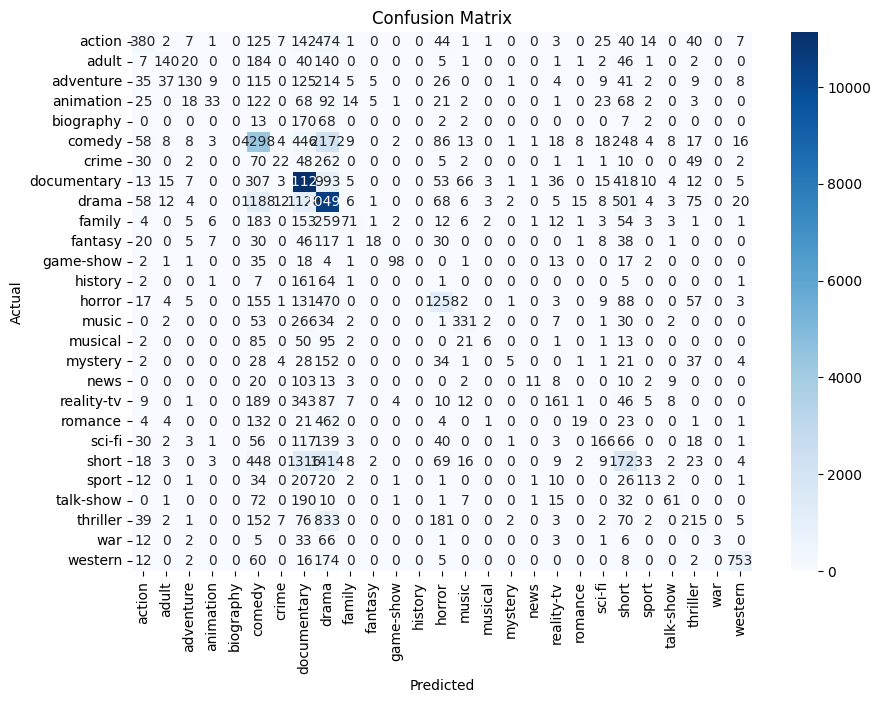

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to load training data: ID ::: TITLE ::: GENRE ::: DESCRIPTION
def load_train_data(filename):
    texts = []
    labels = []
    with open(filename, 'r', encoding='utf-8', errors='ignore') as file:
        for line in file:
            parts = line.strip().split(" ::: ")
            if len(parts) == 4:
                genre = parts[2]
                description = parts[3]
                labels.append(genre)
                texts.append(description)
    return texts, labels

# Function to load test data (ID ::: TITLE ::: DESCRIPTION)
def load_test_texts(filename):
    ids = []
    texts = []
    with open(filename, 'r', encoding='utf-8', errors='ignore') as file:
        for line in file:
            parts = line.strip().split(" ::: ")
            if len(parts) == 3:
                ids.append(parts[0])
                texts.append(parts[2])  # only DESCRIPTION
    return ids, texts

# Function to load test labels from solution file
def load_test_labels(filename):
    labels = []
    with open(filename, 'r', encoding='utf-8', errors='ignore') as file:
        for line in file:
            parts = line.strip().split(" ::: ")
            if len(parts) == 4:
                labels.append(parts[2])  # GENRE
    return labels

# Load datasets
train_texts, train_labels = load_train_data("train_data.txt")
test_ids, test_texts = load_test_texts("test_data.txt")
test_labels = load_test_labels("test_data_solution.txt")

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train = vectorizer.fit_transform(train_texts)
X_test = vectorizer.transform(test_texts)

# Classifier (you can change to MultinomialNB or LinearSVC if needed)
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, train_labels)

# Predict
predictions = clf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(test_labels, predictions))
print("\nClassification Report:\n", classification_report(test_labels, predictions))

# Show sample predictions
for i in range(5):
    print(f"\nID: {test_ids[i]}")
    print(f"Plot: {test_texts[i][:100]}...")
    print(f"Actual Genre: {test_labels[i]}")
    print(f"Predicted Genre: {predictions[i]}")

# Optional: Confusion Matrix
cm = confusion_matrix(test_labels, predictions, labels=clf.classes_)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=clf.classes_, yticklabels=clf.classes_, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
